In [2]:
import pandas as pd
birddata = pd.read_csv("D:\\Projekty\\edx\\Jupyter\\Case_studies\\Bird migration\\bird_tracking.csv")

In [3]:
birddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61920 entries, 0 to 61919
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          61920 non-null  int64  
 1   altitude            61920 non-null  int64  
 2   date_time           61920 non-null  object 
 3   device_info_serial  61920 non-null  int64  
 4   direction           61477 non-null  float64
 5   latitude            61920 non-null  float64
 6   longitude           61920 non-null  float64
 7   speed_2d            61477 non-null  float64
 8   bird_name           61920 non-null  object 
dtypes: float64(4), int64(3), object(2)
memory usage: 4.3+ MB


In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
ix = birddata.bird_name == 'Eric'
ix

0         True
1         True
2         True
3         True
4         True
         ...  
61915    False
61916    False
61917    False
61918    False
61919    False
Name: bird_name, Length: 61920, dtype: bool

In [5]:
x, y = birddata.longitude[ix], birddata.latitude[ix]

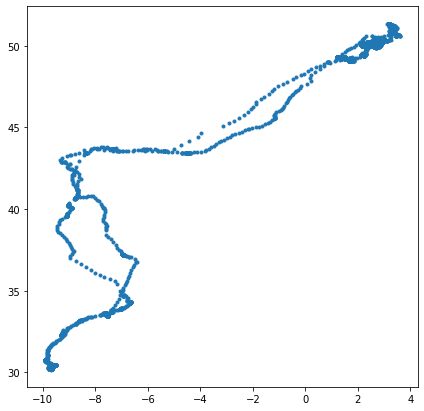

In [6]:
plt.figure(figsize=(7,7))
plt.plot(x,y,'.')

In [7]:
bird_names = pd.unique(birddata.bird_name)

In [8]:
bird_names

array(['Eric', 'Nico', 'Sanne'], dtype=object)

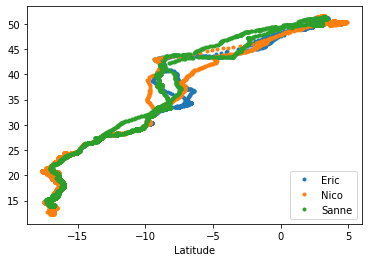

In [9]:
for bird_name in bird_names:
    ix = birddata.bird_name == bird_name
    x, y = birddata.longitude[ix], birddata.latitude[ix]
    plt.plot(x,y,'.', label = bird_name)
plt.xlabel('Longitude')
plt.xlabel('Latitude')
plt.legend(loc='lower right')
plt.savefig('3traj.pdf')

In [10]:
ix = birddata.bird_name == 'Eric'

In [11]:
speed = birddata.speed_2d[ix]

(array([3., 1., 0., 0., 1., 2., 2., 0., 0., 1.]),
 array([0.15      , 0.59422108, 1.03844216, 1.48266324, 1.92688432,
        2.3711054 , 2.81532648, 3.25954756, 3.70376864, 4.14798972,
        4.5922108 ]),
 <a list of 10 Patch objects>)

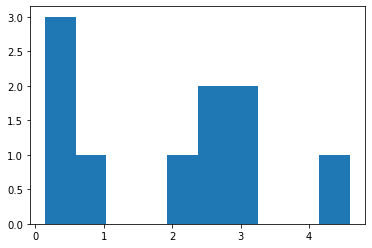

In [12]:
plt.hist(speed[:10])

In [13]:
np.isnan(speed).any()

True

In [14]:
np.sum(np.isnan(speed))

85

In [15]:
ind = np.isnan(speed)

(array([1.7732e+04, 1.5020e+03, 3.6900e+02, 7.8000e+01, 1.2000e+01,
        7.0000e+00, 3.0000e+00, 2.0000e+00, 3.0000e+00, 2.0000e+00]),
 array([ 0.        ,  6.34880658, 12.69761316, 19.04641974, 25.39522632,
        31.7440329 , 38.09283948, 44.44164607, 50.79045265, 57.13925923,
        63.48806581]),
 <a list of 10 Patch objects>)

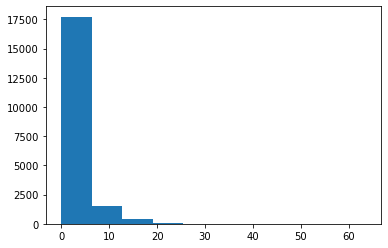

In [16]:
plt.hist(speed[~ind])

Text(0, 0.5, 'Frequency')

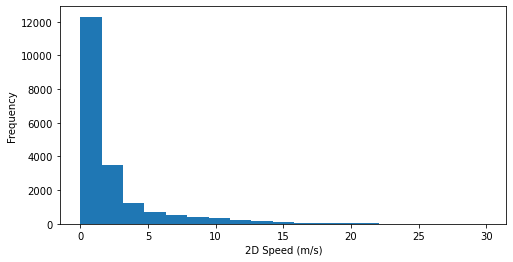

In [17]:
plt.figure(figsize=(8,4))
speed = birddata.speed_2d[ix]
ind = np.isnan(speed)
plt.hist(speed[~ind], bins=np.linspace(0,30,20))
plt.xlabel('2D Speed (m/s)')
plt.ylabel('Frequency')

Text(0.5, 0, '2D Speed')

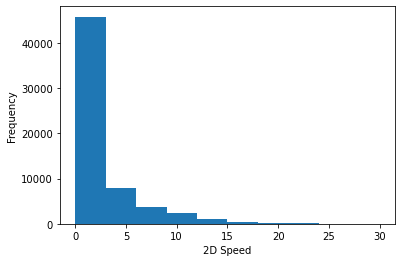

In [18]:
birddata.speed_2d.plot(kind='hist', range=[0,30])
plt.xlabel('2D Speed')

In [19]:
birddata.date_time[0:3]

0    2013-08-15 00:18:08+00
1    2013-08-15 00:48:07+00
2    2013-08-15 01:17:58+00
Name: date_time, dtype: object

In [20]:
import datetime

In [21]:
datetime.datetime.today()

datetime.datetime(2020, 11, 19, 17, 40, 43, 453038)

In [22]:
date_str = birddata.date_time[0]

In [23]:
date_str

'2013-08-15 00:18:08+00'

In [24]:
date = datetime.datetime.strptime(date_str[:-3], "%Y-%m-%d %H:%M:%S")

In [25]:
date

datetime.datetime(2013, 8, 15, 0, 18, 8)

In [26]:
timestamps = []
for k in range(len(birddata)):
    timestamps.append(datetime.datetime.strptime(birddata.date_time.iloc[k][:-3], "%Y-%m-%d %H:%M:%S"))

In [27]:
birddata['timestamp'] = pd.Series(timestamps, index=birddata.index)

In [28]:
birddata.head()

,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,timestamp
0,0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric,2013-08-15 00:18:08
1,1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric,2013-08-15 00:48:07
2,2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric,2013-08-15 01:17:58
3,3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric,2013-08-15 01:47:51
4,4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric,2013-08-15 02:17:42


In [29]:
birddata.timestamp[4] - birddata.timestamp[3]

Timedelta('0 days 00:29:51')

In [37]:
data = birddata[birddata.bird_name=='Eric']
times = data.timestamp
elapsed_time = [time - times[0] for time in times]

In [32]:
elapsed_time[0]

Timedelta('0 days 00:00:00')

In [35]:
elapsed_time[1000] / datetime.timedelta(days=1)

12.084722222222222

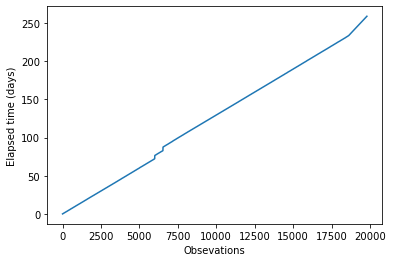

In [36]:
plt.plot(np.array(elapsed_time) / datetime.timedelta(days=1))
plt.xlabel('Obsevations')
plt.ylabel('Elapsed time (days)');
plt.savefig('timeplot.pdf')

In [39]:
elapsed_days = np.array(elapsed_time) / datetime.timedelta(days=1)
next_day = 1
inds = []
daily_mean_speed = []
for i, t in enumerate(elapsed_days):
    if t < next_day:
        inds.append(i)
    else:
        #compute mean
        daily_mean_speed.append(np.mean(data.speed_2d[inds]))
        next_day += 1
        inds = []

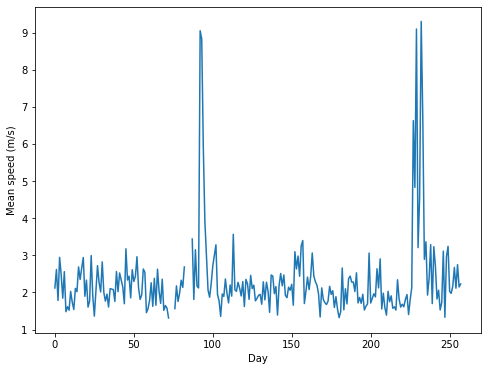

In [40]:
plt.figure(figsize=(8,6))
plt.plot(daily_mean_speed)
plt.xlabel('Day')
plt.ylabel('Mean speed (m/s)');

In [43]:
birddata[birddata.bird_name=='Sanne'].head()

,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,timestamp
40916,40916,55,2013-08-15 00:01:08+00,833,-91.499509,49.931065,2.281893,0.372156,Sanne,2013-08-15 00:01:08
40917,40917,54,2013-08-15 00:31:00+00,833,-141.804053,49.931076,2.281900,1.318484,Sanne,2013-08-15 00:31:00
40918,40918,55,2013-08-15 01:01:19+00,833,-10.651840,49.931016,2.281933,0.076158,Sanne,2013-08-15 01:01:19
40919,40919,56,2013-08-15 01:31:38+00,833,14.727689,49.931053,2.281911,0.014142,Sanne,2013-08-15 01:31:38
40920,40920,55,2013-08-15 02:01:24+00,833,-169.882200,49.931042,2.281893,0.094340,Sanne,2013-08-15 02:01:24


D:\Inne\Programy\Anaconda\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
D:\Inne\Programy\Anaconda\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_ocean.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
D:\Inne\Programy\Anaconda\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
D:\Inne\Programy\Anaconda\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


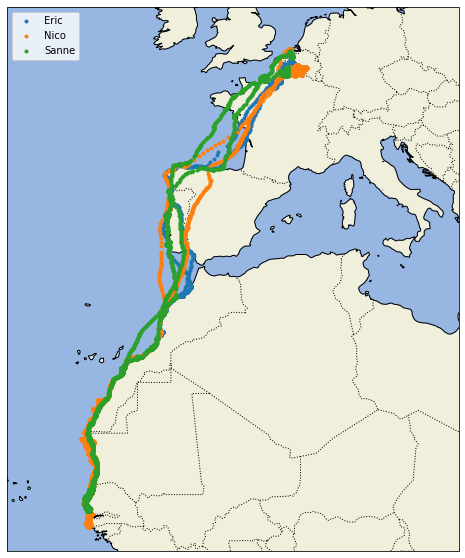

In [46]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

proj = ccrs.Mercator()
plt.figure(figsize=(10,10))
ax = plt.axes(projection=proj)
ax.set_extent((-25.0, 20.0, 52.0, 10.0))
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

for name in bird_names:
    ix = birddata['bird_name'] == name
    x, y = birddata.longitude[ix], birddata.latitude[ix]
    ax.plot(x,y, '.', transform=ccrs.Geodetic(), label = name)

plt.legend(loc='upper left')
plt.savefig('map.pdf')